# MATH5472 Assignment 2 

Name: LU Zetian 

SID: 20777702

## Problem 1

### (a)

Since $X \in \mathbb{R}^{n \times p}$ has full rank , we have that for $n\geq p$, $(X^T X)$ is revertible, and for $n<p$, $(XX^T)$ is revertible.

#### (i)

For $n\geq p$, $\|y-X b\|_2^2=(y-X b)^T(y-X b)=y^Ty-b^TX^Ty-y^TXb+b^TX^TXb=y^Ty-2b^TX^Ty+b^TX^TXb$, 

let $S(b)=\frac{1}{2}\|y-X b\|_2^2$, 

then $\frac{dS}{db}=-X^T y+(X^TX)b$.

Since $(X^T X)$ is revertible, let $S(b)=0$, we have $b=(X^T X)^{-1} X^T y$.

Therefore, for $n\geq p$, $\hat{\beta}=(X^T X)^{-1} X^T y$ minimizes $S(b)$, and thus minimizes $\frac{S(b)}{n}$.

#### (ii)

For $n<p$, let $\beta=X^T(X X^T)^{-1} y$, we have that $X\beta=XX^T(X X^T)^{-1} y=y$. 

So $\frac{1}{2 n}\|y-X \beta\|_2^2=0$, meanwhile $\frac{1}{2 n}\|y-X b\|_2^2\geq0$. 

Thus $\hat{\beta}=X^T(X X^T)^{-1} y$ minimizes $\frac{1}{2 n}\|y-X \beta\|_2^2$.

#### (iii)

Based on the Stein's lemma, $d f=E[\sum_i \frac{\partial \hat{y}_i}{\partial y_i}]$.

For $n\geq p$, $\hat{y}=X \hat{\beta}=X\left(X^T X\right)^{-1} X^T y=H y$, 

where $H=X\left(X^T X\right)^{-1} X^T$ satisfies $H^T=H,H^2=H$, thus $H$ is symmetric and idempotent. Thus $\text{trace}(H)=\text{rank}(H)=p$. 

And $\frac{\partial \hat{y}}{\partial y}=H$, $\sum_{i=1}^n \frac{\partial \hat{y}_i}{\partial y_i}=\text{trace}(H)=p$. Thus $df=p$ for $n \geq p$.

For $n<p$, $\hat{y}=X \hat{\beta}=XX^T\left(X X^T\right)^{-1} y=y$, so $\frac{\partial \hat{y}_i}{\partial y_i}=1$, thus $df = n$ for $n<p$.

### (b)

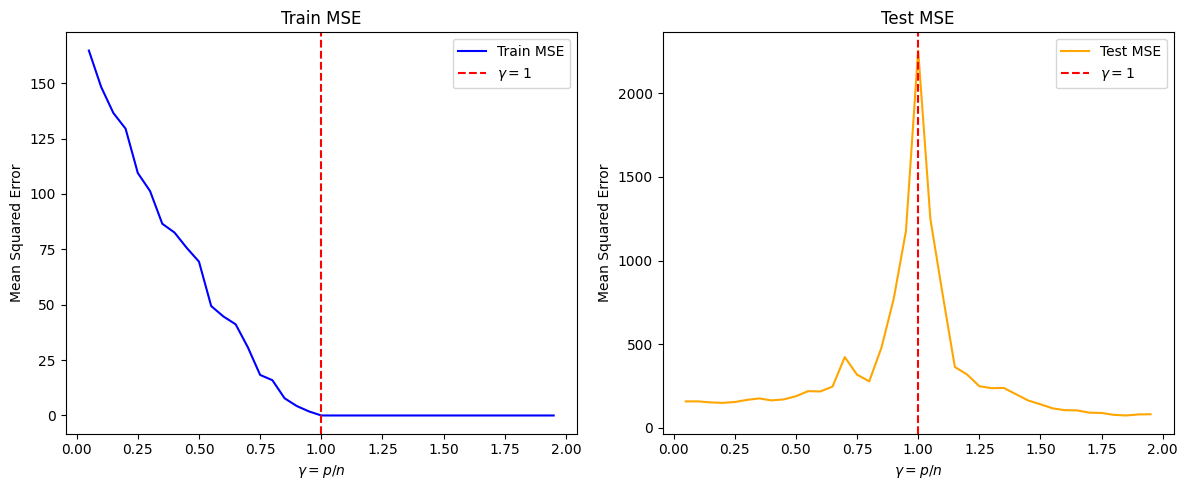

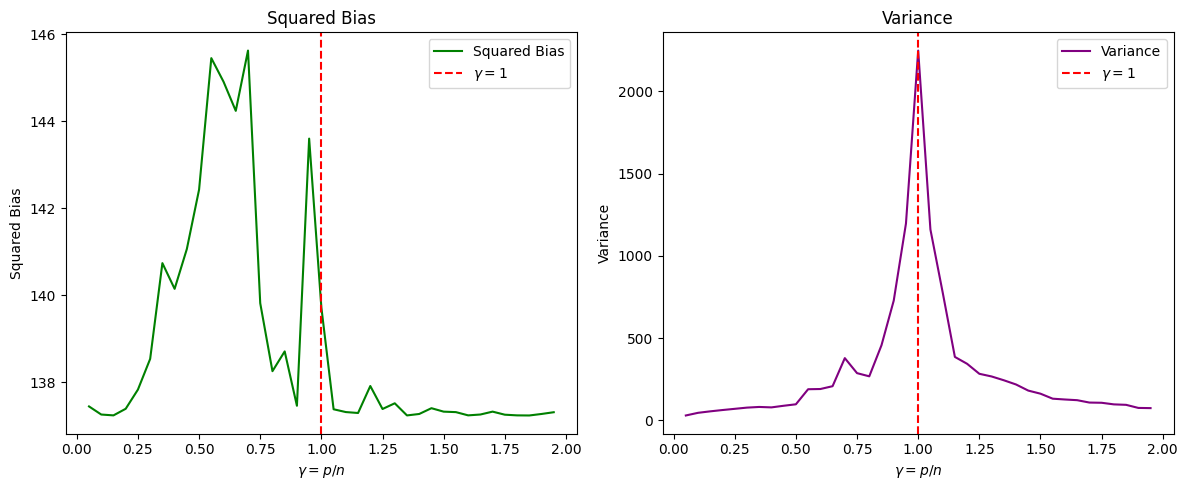

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n = 100  # number of samples
p_max = 200  # maximum number of features
p_list = np.arange(5, p_max, 5)  # number of features
gamma_list = p_list / n

# True coefficients
beta_true = np.random.randn(p_max)

X_full = np.random.randn(n, p_max)
y = X_full @ beta_true + np.random.randn(n) * 0.5

X_test = np.random.randn(n, p_max)
y_test = X_test @ beta_true + np.random.randn(n) * 0.5
y_test_true = X_test @ beta_true

train_errors = []
test_errors = []
bias2_list = []
var_list = []

for p in p_list:
    X = X_full[:, :p]
    X_test_p = X_test[:, :p]
    
    # Fit linear model
    if n >= p:
        beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    else:
        beta_hat = X.T @ np.linalg.inv(X @ X.T) @ y
        
    y_train_pred = X @ beta_hat
    y_test_pred = X_test_p @ beta_hat
    
    train_error = np.mean((y - y_train_pred) ** 2)
    test_error = np.mean((y_test - y_test_pred) ** 2)
    bias2 = np.mean((np.mean(y_test_pred) - y_test_true) ** 2)
    variance = np.var(y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    bias2_list.append(bias2)
    var_list.append(variance)

# 1. Plot train/test MSE side by side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(gamma_list, train_errors, label='Train MSE', color='blue')
plt.axvline(1, color='r', linestyle='--', label=r'$\gamma = 1$')
plt.xlabel(r'$\gamma = p/n$')
plt.ylabel('Mean Squared Error')
plt.title('Train MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gamma_list, test_errors, label='Test MSE', color='orange')
plt.axvline(1, color='r', linestyle='--', label=r'$\gamma = 1$')
plt.xlabel(r'$\gamma = p/n$')
plt.ylabel('Mean Squared Error')
plt.title('Test MSE')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Plot bias and variance side by side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(gamma_list, bias2_list, label='Squared Bias', color='green')
plt.axvline(1, color='r', linestyle='--', label=r'$\gamma = 1$')
plt.xlabel(r'$\gamma = p/n$')
plt.ylabel('Squared Bias')
plt.title('Squared Bias')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gamma_list, var_list, label='Variance', color='purple')
plt.axvline(1, color='r', linestyle='--', label=r'$\gamma = 1$')
plt.xlabel(r'$\gamma = p/n$')
plt.ylabel('Variance')
plt.title('Variance')
plt.legend()

plt.tight_layout()
plt.show()

### (c)

Our goal is to show that $\lim_{k \to \infty} \beta^{(k)} = (X^T X)^{-1} X^T y$. 

Expanding $\beta^{(k)}$: 

$$\beta^{(k)} = \beta^{(k-1)} + \epsilon \frac{X^T}{n} (y - X \beta^{(k-1)}) = \beta^{(k-1)} + \epsilon (\frac{X^T y}{n} - \frac{X^T X}{n} \beta^{(k-1)})$$

Let $A = \frac{X^T X}{n}$ and $b = \frac{X^T y}{n}$, we have: 

$$\beta^{(k)} = \beta^{(k-1)} + \epsilon b - \epsilon A \beta^{(k-1)} = (I - \epsilon A) \beta^{(k-1)} + \epsilon b$$

And let $M = I - \epsilon A$, we have: 

$$\beta^{(k)} = M \beta^{(k-1)} + \epsilon b = M^k \beta^{(0)} + (I + M + ... + M^{k-1}) \epsilon b = (I + M + ... + M^{k-1}) \epsilon b$$

If $\lim_{k \to \infty} M = 0$, then $I + M + M^2 + ... = (I - M)^{-1}$, and so we have: 

$$\lim_{k \to \infty} \beta^{(k)} = (I - M)^{-1} \epsilon b = (\epsilon A)^{-1} \epsilon b = A^{-1} b$$

Substituting $A = \frac{X^T X}{n}$ and $b = \frac{X^T y}{n}$ back to the equation:

$$\lim_{k \to \infty} \beta^{(k)} = (\frac{X^T X}{n})^{-1} \frac{X^T y}{n} = (X^T X)^{-1} X^T y$$

The condition for $\lim_{k \to \infty} M = 0$ is that the absolute value of every eigenvalue of $M$ is strictly smaller than 1, that is, if we let $\lambda_i$ be the eigenvalues of $A$, we need $|1 - \epsilon \lambda_i | < 1 \enspace \forall i$, and this condition is true when $0 < \epsilon \leq 1/\lambda_{max}(A)$. 


### (d)

Given $\frac{d\beta}{dt} + \frac{X^T X}{n} \beta = \frac{X^T y}{n}$ and $\beta(0) = 0$, we will solve this differential equation using the method of integration factors. 

We define the function $\mu(t)$:

$$\mu(t) = e^{\int_0^t \frac{X^T X}{n} dt} = e^{t \frac{X^T X}{n}}$$

Then $\beta(t)$ is

\begin{align*} 
\beta(t) 
    &= \frac{1}{\mu(t)} (\beta(0) + \int_0^t e^{s \frac{X^T X}{n}} \frac{X^T y}{n} ds) \\
    &= \frac{1}{\mu(t)} \int_0^t e^{s \frac{X^T X}{n}} \frac{X^T y}{n} ds \\
    &= \frac{1}{\mu(t)} \big[ (\frac{X^T X}{n})^{-1} e^{s \frac{X^T X}{n}} \frac{X^T y}{n} \big]_0^t \\
    &= \frac{1}{\mu(t)} (e^{t \frac{X^T X}{n}} - I) (X^T X)^{-1} X^T y  \\
    &= (I - e^{-t \frac{X^T X}{n}}) (X^T X)^{-1} X^T y
\end{align*}

### (e)

In Ridge regression, $\hat{\beta}(\lambda) = (X^T X + n \lambda I)^{-1} X^T y$

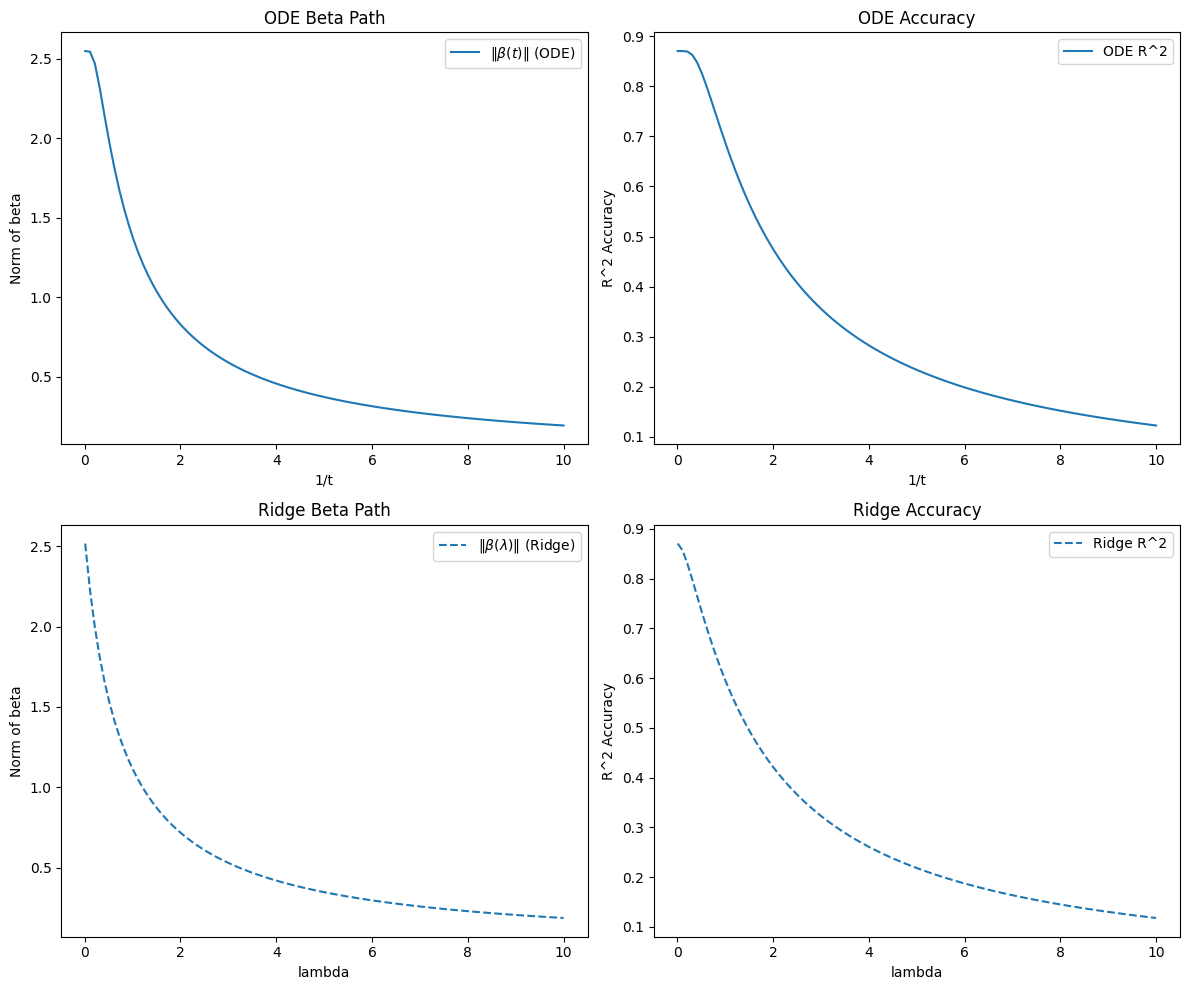

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

np.random.seed(42)

n = 100
p = 5
X = np.random.randn(n, p)
beta_true = np.random.randn(p)
y = X @ beta_true + np.random.randn(n)

XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
Xt_y = X.T @ y

# Ridge regression path: beta(lambda) = (X^T X + n*lambda*I)^{-1} X^T y
lambda_grid = np.linspace(0.01, 10, 100)
beta_ridge_path = np.array([np.linalg.inv(XtX + n * l * np.eye(p)) @ Xt_y for l in lambda_grid])

# ODE solution for OLS: beta(t) = (I - exp(-t * XtX / n)) @ XtX_inv @ Xt_y
t_grid = 1 / lambda_grid
beta_ols_path = np.array([ (np.eye(p) - expm(-t * XtX / n)) @ XtX_inv @ Xt_y for t in t_grid ])

def r2_score(beta):
    y_pred = X @ beta
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - ss_res / ss_tot

r2_ols = [r2_score(beta) for beta in beta_ols_path]
r2_ridge = [r2_score(beta) for beta in beta_ridge_path]

plt.figure(figsize=(12, 10))

# Plot ODE beta(t) and accuracy
plt.subplot(2, 2, 1)
plt.plot(lambda_grid, np.linalg.norm(beta_ols_path, axis=1), label=r'$\|\beta(t)\|$ (ODE)')
plt.xlabel('1/t')
plt.ylabel('Norm of beta')
plt.title('ODE Beta Path')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(lambda_grid, r2_ols, label='ODE R^2')
plt.xlabel('1/t')
plt.ylabel('R^2 Accuracy')
plt.title('ODE Accuracy')
plt.legend()

# Plot Ridge beta(lambda) and accuracy
plt.subplot(2, 2, 3)
plt.plot(lambda_grid, np.linalg.norm(beta_ridge_path, axis=1), label=r'$\|\beta(\lambda)\|$ (Ridge)', linestyle='--')
plt.xlabel('lambda')
plt.ylabel('Norm of beta')
plt.title('Ridge Beta Path')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(lambda_grid, r2_ridge, label='Ridge R^2', linestyle='--')
plt.xlabel('lambda')
plt.ylabel('R^2 Accuracy')
plt.title('Ridge Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The $\hat{\beta}(t)$ and $\hat{\beta}(\lambda)$ show similar behavior when $t = \frac{1}{\lambda}$. This show that ridge regression and early stopping are related. 

## Problem 2

### (a)

Given 
1. $z_{A, i}|\mu_{A, i} \sim N(\mu_{A, i}, 1)$ and $z_{B, i}|\mu_{B, i} \sim \mathcal{N}(\mu_{B, i}, 1)$, 
2. $i = 1, ..., N$, 
3. $z_{A, i}$ and $z_{B, i}$ are observed. 

Assume: 

$$
\begin{pmatrix}
\mu_{A, i} \\
\mu_{B, i} 
\end{pmatrix}
\sim
\mathcal{N}(
    \begin{pmatrix}
    0 \\
    0
    \end{pmatrix}, 
    \Sigma
)
$$

where 

$$
\Sigma = 
\begin{pmatrix}
\sigma_A^2 & \rho\sigma_A\sigma_B \\
\rho\sigma_A\sigma_B & \sigma_B^2 
\end{pmatrix}
$$

Our goal is to derive an algorithm to estimate $\Sigma$, then estimate $\mu_{A, i}^{(\rho)}$ and $\mu_{B, i}^{(\rho)}$. 

**Step 1: Estimate $\Sigma$ (Covariance Matrix)**

$(z_{A, i}, z_{B, i})$ are observed and each is distributed as $\mathcal{N}(0, \Sigma + I)$. 

1. Collect all observed pairs $(z_{A,i}, z_{B,i})$ for $i = 1, \ldots, N$.
2. Compute the sample mean for each variable:
   - $\bar{z}_A = \frac{1}{N} \sum_{i=1}^N z_{A,i}$
   - $\bar{z}_B = \frac{1}{N} \sum_{i=1}^N z_{B,i}$
3. Compute the sample covariance matrix $S$:
   $$
   S = \frac{1}{N} \sum_{i=1}^N \begin{pmatrix} z_{A,i} - \bar{z}_A \\ z_{B,i} - \bar{z}_B \end{pmatrix} \begin{pmatrix} z_{A,i} - \bar{z}_A & z_{B,i} - \bar{z}_B \end{pmatrix}
   $$
4. Since $S \thickapprox \Sigma + I$, we estimate $\Sigma$ as:
   $$
   \hat{\Sigma} = S - I
   $$

**Step 2: Estimate Posterior Means $\mu_{A,i}^{(\rho)}, \mu_{B,i}^{(\rho)}$**
For each $i = 1, \ldots, N$:
1. Form the observed vector $z_i = \begin{pmatrix} z_{A,i} \\ z_{B,i} \end{pmatrix}$.
2. Compute the posterior mean:
   $$
   \hat{\mu}_i = \hat{\Sigma} (\hat{\Sigma} + I)^{-1} z_i
   $$
3. The first entry of $\hat{\mu}_i$ is $\mu_{A,i}^{(\rho)}$, the second is $\mu_{B,i}^{(\rho)}$.

### (b)

#### Correct specification

In [3]:
import numpy as np

np.random.seed(42)

# Simulation parameters
N = 100  # number of samples
rho = 0.8  # correlation coefficient
sigma_A = 1.2
sigma_B = 1.6

# True covariance matrix
Sigma_true = np.array([[sigma_A**2, rho*sigma_A*sigma_B],
                      [rho*sigma_A*sigma_B, sigma_B**2]])

# Generate true means (mu_A, mu_B) for each i
mu = np.random.multivariate_normal([0, 0], Sigma_true, size=N)

# Generate observed data with noise
z = mu + np.random.randn(N, 2)

# --- New algorithm: Estimate Sigma and posterior means ---
# Estimate sample means
z_mean = np.mean(z, axis=0)
# Estimate sample covariance (biased, but fine for large N)
S = np.cov(z, rowvar=False, bias=True)
# Subtract noise variance
Sigma_hat = S - np.eye(2)

# Posterior mean for each i
Sigma_hat_plus_I = Sigma_hat + np.eye(2)
Sigma_hat_inv = np.linalg.inv(Sigma_hat_plus_I)
mu_hat = (Sigma_hat @ Sigma_hat_inv @ z.T).T  # shape (N,2)

# --- James-Stein Estimator (JSE, rho=0) ---
# JSE shrinks each coordinate separately
sigma_A2_hat = S[0,0] - 1
sigma_B2_hat = S[1,1] - 1
# Shrinkage factor for each coordinate
def james_stein(z_col, sigma2):
    return (sigma2 / (sigma2 + 1)) * z_col

mu_hat_jse = np.zeros_like(z)
mu_hat_jse[:,0] = james_stein(z[:,0], sigma_A2_hat)
mu_hat_jse[:,1] = james_stein(z[:,1], sigma_B2_hat)

# --- Compute expected squared losses ---
loss_new = np.mean(np.sum((mu_hat - mu)**2, axis=1))
loss_jse = np.mean(np.sum((mu_hat_jse - mu)**2, axis=1))

print(f"Expected squared loss (New): {loss_new:.4f}")
print(f"Expected squared loss (JSE):  {loss_jse:.4f}")

Expected squared loss (New): 1.0759
Expected squared loss (JSE):  1.3271


#### Misspecification

In [4]:
import numpy as np

np.random.seed(42)

# Simulation parameters
N = 100  # number of samples
rho = 0.8  # correlation coefficient
sigma_A = 1.2
sigma_B = 1.6

# True covariance matrix
Sigma_true = np.array([[sigma_A**2, rho*sigma_A*sigma_B],
                      [rho*sigma_A*sigma_B, sigma_B**2]])

# Generate true means (mu_A, mu_B) for each i
mu = np.random.multivariate_normal([2, -2], Sigma_true, size=N)

# Generate observed data with noise
z = mu + np.random.randn(N, 2)

# --- New algorithm: Estimate Sigma and posterior means ---
# Estimate sample means
z_mean = np.mean(z, axis=0)
# Estimate sample covariance (biased, but fine for large N)
S = np.cov(z, rowvar=False, bias=True)
# Subtract noise variance
Sigma_hat = S - np.eye(2)

# Posterior mean for each i
Sigma_hat_plus_I = Sigma_hat + np.eye(2)
Sigma_hat_inv = np.linalg.inv(Sigma_hat_plus_I)
mu_hat = (Sigma_hat @ Sigma_hat_inv @ z.T).T  # shape (N,2)

# --- James-Stein Estimator (JSE, rho=0) ---
# JSE shrinks each coordinate separately
sigma_A2_hat = S[0,0] - 1
sigma_B2_hat = S[1,1] - 1
# Shrinkage factor for each coordinate
def james_stein(z_col, sigma2):
    return (sigma2 / (sigma2 + 1)) * z_col

mu_hat_jse = np.zeros_like(z)
mu_hat_jse[:,0] = james_stein(z[:,0], sigma_A2_hat)
mu_hat_jse[:,1] = james_stein(z[:,1], sigma_B2_hat)

# --- Compute expected squared losses ---
loss_new = np.mean(np.sum((mu_hat - mu)**2, axis=1))
loss_jse = np.mean(np.sum((mu_hat_jse - mu)**2, axis=1))

print(f"Expected squared loss (New): {loss_new:.4f}")
print(f"Expected squared loss (JSE):  {loss_jse:.4f}")

Expected squared loss (New): 5.8422
Expected squared loss (JSE):  3.3914


### (c)

The simulation shows that the algorithm generally achieves lower expected squared loss than the James-Stein estimator, especially when the correlation $\rho$ is large/nonzero. But when the model is misspecified, the preformance drops drastically. 

## Problem 3

### (a)

In [5]:
import numpy as np
from numpy.linalg import inv

np.random.seed(42)

n = 70
p = 30

X = np.random.randn(n, p)
beta = np.random.randn(p)
y = X @ beta + np.random.randn(n)

# Compute OLS estimate: beta_hat
XtX = X.T @ X
XtX_inv = inv(XtX)
Xt_y = X.T @ y
beta_hat = XtX_inv @ Xt_y

# Compute y_hat
y_hat = X @ beta_hat

# Compute the hat matrix H
H = X @ XtX_inv @ X.T

# df = trace(H)
df = np.trace(H)

print(f"Degrees of freedom (df) of OLS estimate: {df:.2f}, expected p = {p}")

Degrees of freedom (df) of OLS estimate: 30.00, expected p = 30


### (b)

Given $m$ linear constraints of the form $A \beta = 0$, where $A \in \mathbb{R}^{m \times p}$. The constrained minimization can be solved using Lagrange multipliers.

Forming the Lagrangian: 

$$\mathcal{L}(\beta, \lambda) = \|y-X \beta\|_2^2 + 2 \lambda^\top A \beta$$

and the derivative with respect to $\beta$ is:

$$\frac{\partial \mathcal{L}}{\partial \beta} = -2 X^\top y + 2 X^\top X \beta + 2 A^\top \lambda = 0$$

By reordering the equation, we have:

$$X^\top X \beta + A^\top \lambda = X^\top y$$
$$\beta = (X^\top X)^{-1} (X^\top y - A^\top \lambda)$$

Since $A \beta = 0$, we have:

$$A (X^\top X)^{-1} (X^\top y - A^\top \lambda) = 0$$
$$\lambda = (A (X^\top X)^{-1} A^\top)^{-1} A (X^\top X)^{-1} X^\top y$$

Substitute $\lambda$ back into the expression for $\beta$:

$$\beta = (X^\top X)^{-1} (X^\top y - A^\top (A (X^\top X)^{-1} A^\top)^{-1} A (X^\top X)^{-1} X^\top y) = \big[I - (X^\top X)^{-1} A^\top \big(A (X^\top X)^{-1} A^\top\big)^{-1} A\big] (X^\top X)^{-1} X^\top y$$

Let $P = I - Q$ and $Q = (X^\top X)^{-1} A^\top \big(A (X^\top X)^{-1} A^\top\big)^{-1} A$, we have:

$$\beta = P (X^\top X)^{-1} X^\top y$$

Since $Q$ has a rank of $m$, $P$ has rank $p - m$.

The fitted values are $\hat{y}_c = X \beta = H_c y$, where $H_c = X P (X^\top X)^{-1} X^\top$ is the constrained hat matrix, which projects onto a subspace of dimension $p - m$. The effective degrees of freedom is $\operatorname{trace}(H_c) = p - m$.

In [6]:
import numpy as np
from numpy.linalg import inv

np.random.seed(42)

n = 70
p = 30
m = 10  # number of constraints

X = np.random.randn(n, p)
beta = np.random.randn(p)
y = X @ beta + np.random.randn(n)

# Generate a random constraint matrix A (m x p), full rank
A = np.random.randn(m, p)
while np.linalg.matrix_rank(A) < m:
    A = np.random.randn(m, p)

# Compute unconstrained OLS estimate: beta_hat
XtX = X.T @ X
XtX_inv = inv(XtX)
Xt_y = X.T @ y
beta_hat = XtX_inv @ Xt_y

# Compute Q and P matrices
Q = XtX_inv @ A.T @ inv(A @ XtX_inv @ A.T) @ A
P = np.eye(p) - Q
beta_hat_c = P @ beta_hat

print(f"Validate that A @ beta_hat_c is close to zero: {np.linalg.norm(A @ beta_hat_c):.2e}")

# Compute y_hat for constrained estimator
y_hat_c = X @ beta_hat_c

# Compute the constrained hat matrix H_c
H_c = X @ P @ XtX_inv @ X.T

# Degrees of freedom for constrained OLS
df_c = np.trace(H_c)

print(f"Degrees of freedom (df) of constrained OLS estimate: {df_c:.2f}, expected p - m = {p - m}")

Validate that A @ beta_hat_c is close to zero: 5.28e-15
Degrees of freedom (df) of constrained OLS estimate: 20.00, expected p - m = 20
